<a href="https://colab.research.google.com/github/PavelStelmakhV/hw303-data-visualization/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Вывести первые строки таблицы с помощью метода head

In [46]:
import pandas as pd
import numpy as np
import lxml
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
tmp = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України ', thousands=' ', decimal=',')
df = tmp[0]
df_init = df.copy()
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


2. Определите количество строк и столбцов в датафрейме (атрибут shape)

In [47]:
print(df.shape)

(28, 9)


3. Замените в таблице значения "—" на значения NaN

In [48]:
df.replace('—', np.nan, inplace=True)

4. Определите типы всех столбцов с помощью dataframe.dtypes

In [49]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

5. Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [50]:
df['2014'] =  df['2014'].astype('float64')
df['2019'] =  df['2019'].astype('float64')

6. Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [51]:
shr_nan_2014 = round(df['2014'].isnull().sum() / 
                     (df['2014'].count() + df['2014'].isnull().sum()) * 100, 2)
print(f'Доля пропусков в колонке [2014] - {shr_nan_2014}%')
 
shr_nan_2019 = round(df['2019'].isnull().sum() / 
                     (df['2019'].count() + df['2019'].isnull().sum()) * 100, 2)
print(f'Доля пропусков в колонке [2019] - {shr_nan_2019}%') 

Доля пропусков в колонке [2014] - 7.14%
Доля пропусков в колонке [2019] - 14.29%


7. Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [52]:
totalUkraine = df.iloc[27]
df.drop([27], axis=0, inplace=True)

8. Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [53]:
df.fillna({x: df[x].mean() for x in df.columns[1:]}, inplace=True) 

9. Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [54]:
region_list = df.loc[df['2019'] > totalUkraine['2019']]['Регіон']
print(region_list)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


10. В каком регионе была самая высокая рождаемость в 2014 году?

In [55]:
df.loc[df['2014'] == df['2014'].max()]['Регіон']

16    Рівненська
Name: Регіон, dtype: object

11. Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

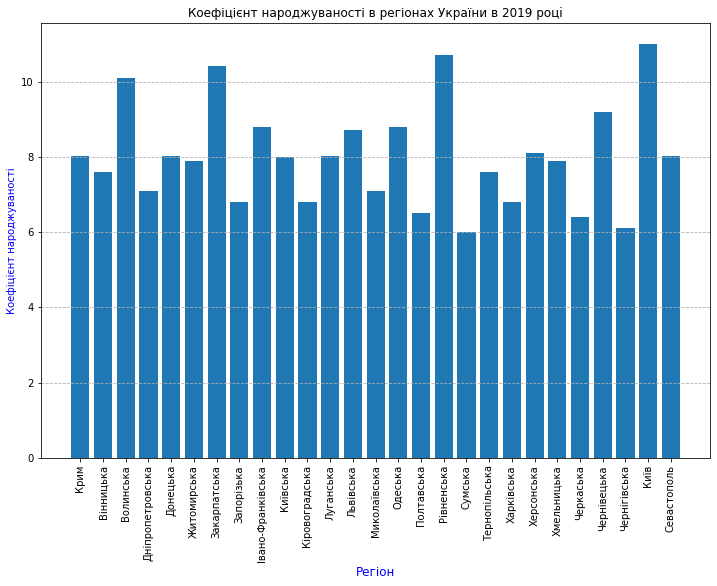

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(df['Регіон'], df['2019'])
plt.title('Коефіцієнт народжуваності в регіонах України в 2019 роцi')
plt.xlabel('Регіон', color = 'blue', fontsize = 'large')
plt.ylabel('Коефіцієнт народжуваності', color = 'blue')
plt.xticks(rotation=90)
plt.grid(ls = '--', axis = 'y')
plt.show()

# Визуализация данных

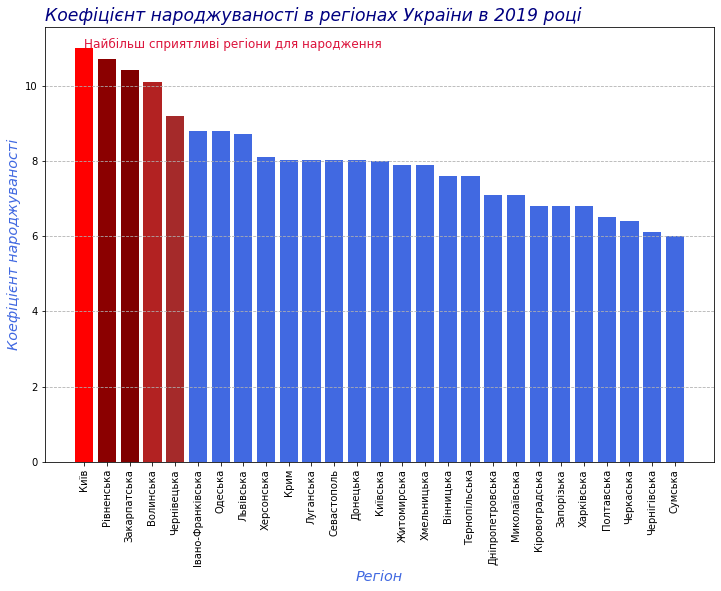

In [57]:
%matplotlib inline
new_df = df.sort_values(by='2019', ascending=False).copy()
color_bar = ['red', 'darkred', 'maroon', 'firebrick', 'brown']
color_bar += ['royalblue'] * (len(new_df['Регіон']) - len(color_bar))
plt.figure(figsize=(12, 8))
plt.bar(new_df['Регіон'], new_df['2019'], color=color_bar)
plt.title('Коефіцієнт народжуваності в регіонах України в 2019 роцi', color = 'navy',fontsize = 'xx-large', fontstyle ='oblique', loc='left')
plt.xlabel('Регіон', color = 'royalblue', fontsize = 'x-large', fontstyle ='italic')
plt.ylabel('Коефіцієнт народжуваності', color = 'royalblue', fontsize = 'x-large', fontstyle ='italic')
plt.xticks(rotation=90)
plt.grid(ls = '--', axis = 'y')
plt.text('Київ', 11, 'Найбiльш сприятливi регiони для народження', color="crimson", fontsize = 'large')
plt.show()

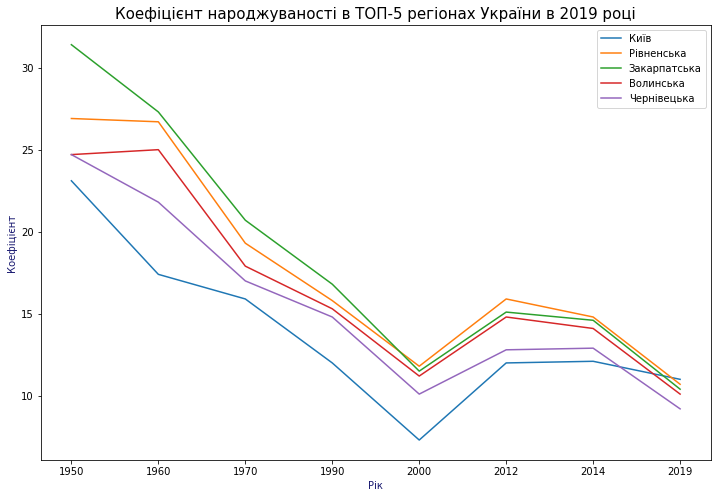

In [63]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(12, 8))
for row in range(5):
  axs.plot(new_df.columns[1:], new_df.iloc[row].tolist()[1:], label=new_df.iloc[row].tolist()[0])
plt.xlabel('Рік', fontsize='medium', color='midnightblue')
plt.ylabel('Коефіцієнт', fontsize='medium', color='midnightblue')
plt.title('Коефіцієнт народжуваності в ТОП-5 регіонах України в 2019 році', fontsize=15)
plt.legend()
plt.show()

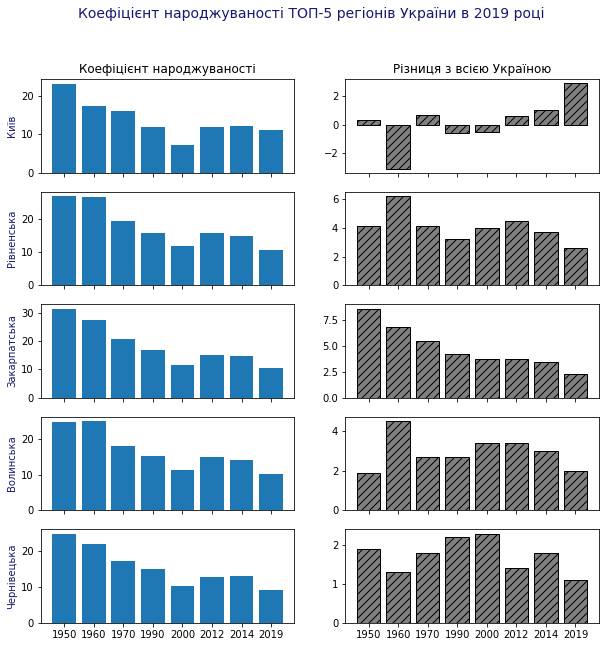

In [64]:
%matplotlib inline
fig, axs = plt.subplots(5, 2, figsize=(10, 10), sharex=True)
for row in range(5):
  axs[row, 0].bar(new_df.columns.tolist()[1:], new_df.iloc[row].tolist()[1:])
  axs[row, 0].set_ylabel(new_df.iloc[row]['Регіон'], fontsize='medium', color='midnightblue')
  diff = np.array(new_df.iloc[row].tolist()[1:]) - np.array(totalUkraine.tolist()[1:])
  axs[row, 1].bar(new_df.columns.tolist()[1:], diff, color='grey', edgecolor='black', hatch='///')
axs[0, 0].set_title('Коефіцієнт народжуваності')
axs[0, 1].set_title('Різниця з всією Україною')
fig.suptitle('Коефіцієнт народжуваності ТОП-5 регіонів України в 2019 році', fontsize=14, color='midnightblue')
plt.show()

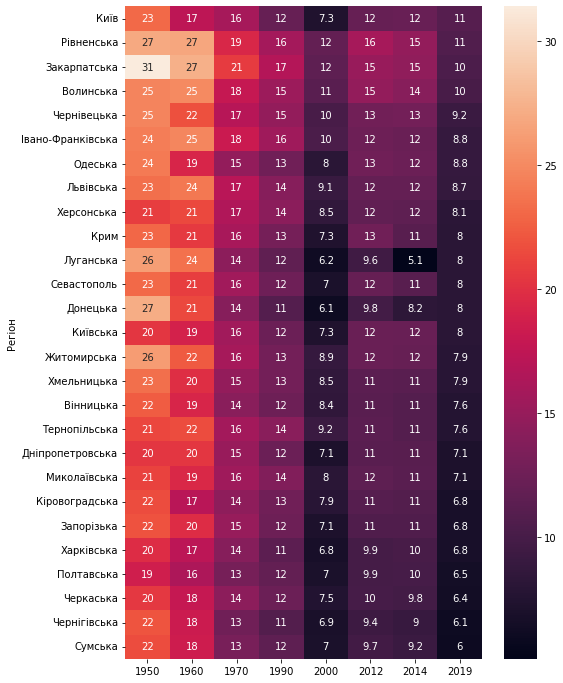

In [65]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8, 12))
sns.heatmap(new_df.set_index('Регіон'), annot = True)
plt.show()